In [30]:
from sklearn.preprocessing import MinMaxScaler
from ydata_profiling import ProfileReport
import scipy
import numpy as np
import sklearn as sk
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [17]:
import sweetviz as sv

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
from metric_learn import LFDA

In [89]:
"""
NOT WORKING, RETURNS EMPTY DATAFRAME
from nba_api.stats.endpoints import leaguedashplayerstats
leaguedashplayerstats.LeagueDashPlayerStats(
    season=2019-20,
    per_mode_detailed="PerGame",
    measure_type_detailed_defense='Base'
).get_data_frames()
"""

[Empty DataFrame
 Columns: [PLAYER_ID, PLAYER_NAME, NICKNAME, TEAM_ID, TEAM_ABBREVIATION, AGE, GP, W, L, W_PCT, MIN, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, FTA, FT_PCT, OREB, DREB, REB, AST, TOV, STL, BLK, BLKA, PF, PFD, PTS, PLUS_MINUS, NBA_FANTASY_PTS, DD2, TD3, WNBA_FANTASY_PTS, GP_RANK, W_RANK, L_RANK, W_PCT_RANK, MIN_RANK, FGM_RANK, FGA_RANK, FG_PCT_RANK, FG3M_RANK, FG3A_RANK, FG3_PCT_RANK, FTM_RANK, FTA_RANK, FT_PCT_RANK, OREB_RANK, DREB_RANK, REB_RANK, AST_RANK, TOV_RANK, STL_RANK, BLK_RANK, BLKA_RANK, PF_RANK, PFD_RANK, PTS_RANK, PLUS_MINUS_RANK, NBA_FANTASY_PTS_RANK, DD2_RANK, TD3_RANK, WNBA_FANTASY_PTS_RANK]
 Index: []
 
 [0 rows x 66 columns]]

In [99]:
import pandas as pd
        
MSDS_422_FinalProject_Individual_Stats = pd.read_csv('../data/MSDS_422_FinalProject_Individual_Stats.csv')

df_full=MSDS_422_FinalProject_Individual_Stats


In [100]:
len(df_full['PLAYER_NAME'].unique().tolist())

2359

In [40]:
col_names = list(df_full.columns)
feature_col_names = list(df_full.columns)[9:]

In [37]:
#save the profile variables separately 
df_profiles = df_full[0:10]
#all the columns from 9 to the end
df_features = df_full.iloc[:,10:]

In [38]:
#impute nan values
imputer = sk.impute.SimpleImputer(strategy='mean')
df_features = imputer.fit_transform(df_features)

In [41]:
feature_col_names_updated = feature_col_names[:df_features.shape[1]]

# Now convert the imputed array back to a DataFrame with the correct column names
df_features = pd.DataFrame(df_features, columns=feature_col_names_updated)

In [49]:
#creat an EFG Column
df_features['EFG'] = round((df_features['FGM'] + 0.5*df_features['FG3M'])/df_features['FGA'], 4)

In [ ]:
#add the target back in but we don't have our tarket get, will get it from subset modeling
#df = pd.concat([df_full.loc[:,'W'],df_features],axis=1)

In [23]:
splayer_eda = sv.analyze(df_features)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
splayer_eda.show_html()

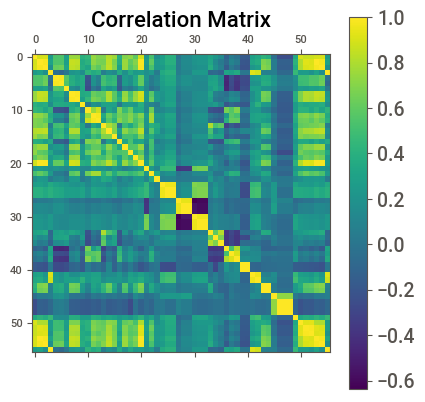

In [42]:
#plot correletoins between features
plt.matshow(df_features.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

In [45]:
#drop features with higher than 0.6 correlation in more than one pair
corr=df_features.corr()
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
threshold = 0.6
to_drop = [column for column in upper.columns if sum(abs(upper[column])>threshold)>4]

In [46]:
feature_subset=df_features.drop(df_features[to_drop], axis=1)
feature_col_names = feature_subset.columns

In [53]:
#other drops
to_drop_manual = ['DD2',]

W_PCT                 0.173754
MIN                   0.238270
FGM                   0.228211
FGA                   0.043844
FG_PCT                0.119331
FG3M                  0.135251
FG3A                  0.046187
FG3_PCT               0.246916
FTM                   0.252857
FTA                   0.037427
FT_PCT                0.092183
OREB                  0.252667
DREB                  0.214511
REB                   0.358865
AST                   0.317001
TOV                   0.206241
STL                   0.057135
BLK                   0.159148
BLKA                  0.101153
PF                    0.239965
PFD                   0.244390
PTS                   0.120782
PLUS_MINUS            0.369558
DD2                   1.000000
TD3                   0.075056
E_OFF_RATING          0.091113
OFF_RATING            0.091113
sp_work_OFF_RATING    0.010026
E_DEF_RATING          0.028146
DEF_RATING            0.028146
sp_work_DEF_RATING    0.050844
E_NET_RATING          0.054407
NET_RATI

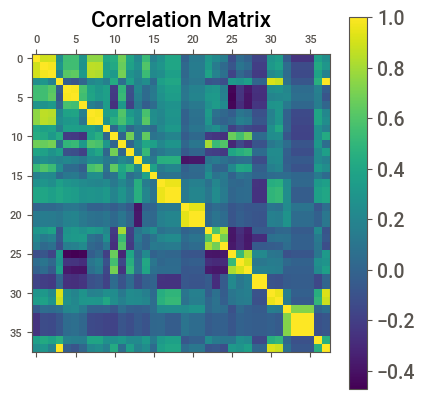

In [48]:
plt.matshow(feature_subset.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

In [56]:
#cast the features onto the same 0 to 1 scale
scalar = MinMaxScaler(feature_range=(0,1))
scaled_features = scalar.fit_transform(feature_subset)
scaled_features = pd.DataFrame(scaled_features, columns=feature_col_names)

In [28]:
splayer_eda = sv.analyze(scaled_features)

                                             |          | [  0%]   00:00 -> (? left)

In [29]:
splayer_eda.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [102]:
#setup a target for LDA    
team_stats = pd.read_csv('../data/MSDS_422_FinalProject_Team_Stats_with_Four_Factors.csv')
team_col_list=list(team_stats.columns)

In [103]:
bin_edges = [0,25,50,75,100]
tiers = ['lowest', "low", 'high', 'highest']
team_stats['WPCT_tier'] = pd.cut(team_stats['W_PCT'], bins=bin_edges, labels=tiers)
team_stats['WPCT_tier'].unique()

['lowest']
Categories (4, object): ['lowest' < 'low' < 'high' < 'highest']

In [78]:
df_profiles['TEAM_ABBREVIATION'].unique

<bound method Series.unique of 0    MIA
1    CHI
2    PHI
3    NJN
4    GSW
5    GSW
6    BOS
7    IND
8    ATL
9    NYK
Name: TEAM_ABBREVIATION, dtype: object>

In [74]:
team_stats['TEAM_NAME'].unique

<bound method Series.unique of 0           Atlanta Hawks
1          Boston Celtics
2           Brooklyn Nets
3       Charlotte Hornets
4           Chicago Bulls
              ...        
175      Sacramento Kings
176     San Antonio Spurs
177       Toronto Raptors
178             Utah Jazz
179    Washington Wizards
Name: TEAM_NAME, Length: 180, dtype: object>

In [104]:
#ony have a subset of teams, so we need to filter for those teams in teh team_stats
sub_team_stats = team_stats[team_stats['TEAM_ID'].isin(df_profiles['TEAM_ID'])]

In [108]:
sub_team_stats["TEAM_NAME"].value_counts() #good.

TEAM_NAME
Atlanta Hawks            6
Boston Celtics           6
Brooklyn Nets            6
Chicago Bulls            6
Golden State Warriors    6
Indiana Pacers           6
Miami Heat               6
New York Knicks          6
Philadelphia 76ers       6
Name: count, dtype: int64

In [ ]:
fda = LFDA(feature_subset,df_full[])

In [ ]:
from sklearn.decomposition import PCA

In [50]:
#do PCA
pca=sk.decomposition.PCA()
pca.fit(scaled_features)


PCA()

In [51]:

print(pca.explained_variance_ratio_*100)
p_explained = pca.explained_variance_ratio_*100
p_running = np.cumsum(p_explained)
print(p_running)

[4.50477316e+01 1.73598953e+01 8.76022037e+00 5.99279313e+00
 5.11496415e+00 3.36027783e+00 2.86794894e+00 2.16017226e+00
 1.50744603e+00 1.40580313e+00 1.14099264e+00 1.05573755e+00
 9.02161747e-01 7.00033776e-01 6.54440176e-01 4.80064467e-01
 3.47914975e-01 2.40588616e-01 2.06484778e-01 1.37164162e-01
 1.25690786e-01 1.07734293e-01 8.12007365e-02 6.05460897e-02
 4.49234922e-02 3.35419347e-02 3.17941499e-02 2.09844088e-02
 1.75439300e-02 1.41654656e-02 1.09668624e-02 7.86972331e-03
 2.02529361e-04 3.64001384e-08 1.63540522e-09 1.63523367e-09
 2.15471867e-11 8.28780483e-31]
[ 45.04773158  62.40762685  71.16784721  77.16064034  82.27560449
  85.63588232  88.50383126  90.66400352  92.17144955  93.57725268
  94.71824532  95.77398286  96.67614461  97.37617839  98.03061856
  98.51068303  98.858598    99.09918662  99.3056714   99.44283556
  99.56852634  99.67626064  99.75746137  99.81800746  99.86293096
  99.89647289  99.92826704  99.94925145  99.96679538  99.98096085
  99.99192771  99.99979

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Get the feature contributions for each principal component
topXfeatures = 8
feature_contributions = pca.components_[:topXfeatures] 

In [ ]:
num_components = len(feature_contributions)
num_features = len(feature_col_names)
fig, axes = plt.subplots(num_components, 1, figsize=(10, 6*num_components))

for i in range(num_components):
    ax = axes[i]
    ax.bar(np.arange(num_features), feature_contributions[i], color='blue')
    ax.set_title(f"Principal Component {i+1} Feature Contributions")
    ax.set_xlabel("Feature Index")
    ax.set_ylabel("Contribution")
    ax.set_xticks(np.arange(num_features))
    ax.set_xticklabels(feature_col_names, rotation=90)
    
    ax.text(0.95, 0.95, f'Variance Explained: {p_explained[i]:.2f}',
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes, fontsize=10, color='black', bbox=dict(facecolor='none', edgecolor='none'))
    
    #plt.savefig(f"pc{i+1}_feature_contributions.jpg", bbox_inches='tight', dpi=300)
    #plt.close(fig)

plt.tight_layout()
plt.show()

In [ ]:
num_components = len(feature_contributions)
num_features = len(feature_col_names)
fig_scale=1.2
fig, axs = plt.subplots(2, 2, figsize=(20*fig_scale, 12*fig_scale))
#fig, axes = plt.subplots(num_components, 1, figsize=(10, 6*num_components))

for i in range(num_components):
    #ax = axes[i]
    row = i // 2  
    col = i % 2
    axs[row, col].bar(np.arange(num_features), feature_contributions[i], color='blue')
    axs[row, col].set_title(f"Principal Component {i + 1} Feature Contributions")
    #axs[row, col].set_xlabel("Feature Index")
    axs[row, col].set_ylabel("Contribution")
    axs[row, col].set_xticks(np.arange(num_features))
    if i == 2 or i == 3:
        axs[row, col].xaxis.tick_top()
        axs[row, col].set_xticklabels(feature_col_names, rotation=90)
        axs[row, col].set_title(f" ", loc='center')

    axs[row, col].text(0.9, 0.9, f'Variance Explained: {p_explained[i]:.2f}',
                       verticalalignment='top', horizontalalignment='right',
                       transform=axs[row, col].transAxes, fontsize=10, color='black',
                       bbox=dict(facecolor='none', edgecolor='none'))
    


plt.savefig("top4_contributions.jpg", bbox_inches='tight', dpi=300)
plt.close(fig)

plt.show()

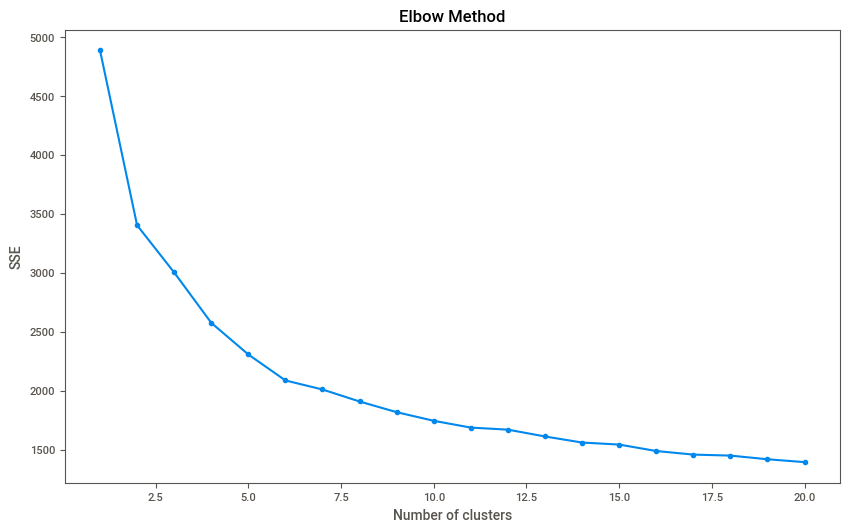

In [63]:
### K-Means Clustering

from sklearn.cluster import KMeans

clusters = pd.DataFrame(scaled_features, columns=feature_col_names)

# determine the number of clusters (k)
sse = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# plot SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [64]:
# apply K-Means Clustering
k = 12
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

clusters['Cluster_KMeans'] = cluster_labels

In [ ]:
### DBScan Clustering

from sklearn.cluster import DBSCAN

In [65]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(scaled_features)

clusters['Cluster_DBSCAN'] = cluster_labels

In [66]:
import numpy as np

unique_clusters = np.unique(cluster_labels)
n_noise = list(cluster_labels).count(-1)

print(f"Number of clusters: {len(unique_clusters) - (1 if -1 in unique_clusters else 0)}")
print(f"Number of noise points: {n_noise}")

Number of clusters: 14
Number of noise points: 112


In [67]:
### Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [68]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model = clustering.fit(scaled_features)

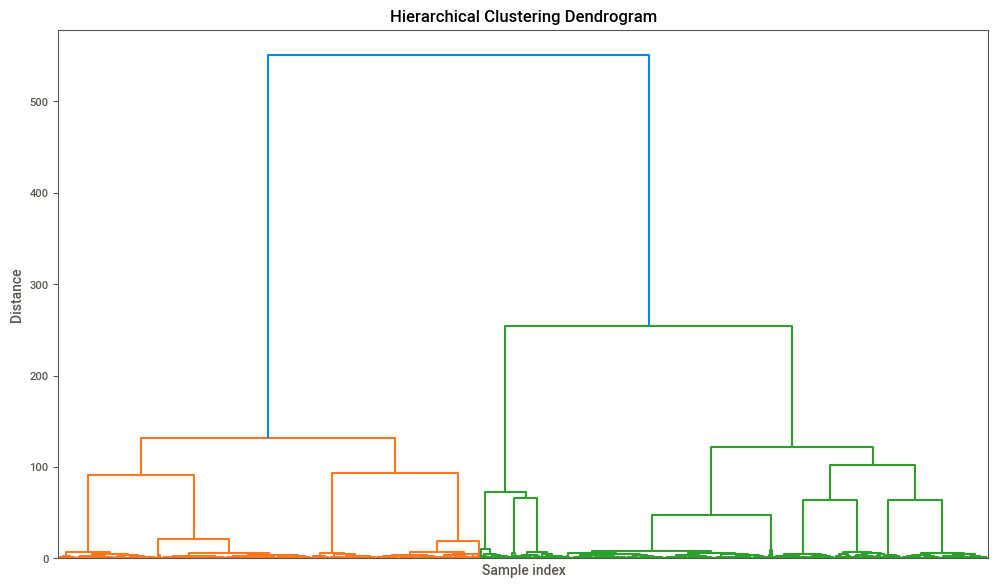

In [69]:
Z = linkage(scaled_features, 'ward')

#plot the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(Z, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


In [70]:
n_clusters = 10
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = clustering.fit_predict(scaled_features)

clusters['Cluster_Hierarchical'] = cluster_labels

In [71]:
clusters.head(20)

,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,EFG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,FGA_PG,Cluster_KMeans,Cluster_DBSCAN,Cluster_Hierarchical
0,0.392202,0.147541,0.143885,0.444,0.000000,0.007576,0.000,0.095238,0.106870,0.712,...,0.328000,0.347907,0.072507,0.072520,0.072507,0.734698,0.444,3,0,3
1,0.433486,0.196721,0.208633,0.406,0.150943,0.159091,0.391,0.047619,0.038168,0.833,...,0.330000,0.349538,0.071908,0.071922,0.071908,0.730749,0.406,1,1,5
2,0.720183,0.360656,0.338129,0.473,0.132075,0.166667,0.312,0.190476,0.198473,0.768,...,0.366000,0.361653,0.081820,0.081820,0.081820,0.739365,0.473,5,2,6
3,0.651376,0.295082,0.284173,0.457,0.000000,0.000000,0.000,0.285714,0.290076,0.787,...,0.355333,0.362973,0.082252,0.082259,0.082252,0.735057,0.457,2,3,7
4,0.286697,0.081967,0.086331,0.403,0.000000,0.000000,0.333,0.057143,0.068702,0.619,...,0.300000,0.369147,0.088539,0.088525,0.088539,0.728056,0.403,9,4,1
5,0.575688,0.221311,0.233813,0.416,0.000000,0.000000,0.000,0.047619,0.091603,0.441,...,0.281333,0.373612,0.091432,0.091439,0.091432,0.731467,0.416,2,3,7
6,0.192661,0.065574,0.079137,0.340,0.037736,0.045455,0.346,0.038095,0.038168,0.750,...,0.288000,0.364914,0.096654,0.096667,0.096654,0.731826,0.340,9,4,1
7,0.555046,0.254098,0.251799,0.444,0.000000,0.007576,0.143,0.123810,0.152672,0.656,...,0.319333,0.357731,0.078461,0.078467,0.078461,0.730390,0.444,7,5,2
8,0.566514,0.336066,0.330935,0.444,0.000000,0.000000,0.000,0.228571,0.282443,0.638,...,0.324667,0.368098,0.087208,0.087208,0.087208,0.732544,0.444,2,3,7
9,0.837156,0.565574,0.557554,0.449,0.226415,0.242424,0.381,0.342857,0.297710,0.909,...,0.362000,0.346898,0.066653,0.066693,0.066653,0.739006,0.449,10,6,0


In [72]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#calculate metrics for all three models
silhouette_kmeans = silhouette_score(scaled_features, clusters['Cluster_KMeans'])
calinski_harabasz_kmeans = calinski_harabasz_score(scaled_features, clusters['Cluster_KMeans'])
davies_bouldin_kmeans = davies_bouldin_score(scaled_features, clusters['Cluster_KMeans'])

silhouette_dbscan = silhouette_score(scaled_features, clusters['Cluster_DBSCAN'])
calinski_harabasz_dbscan = calinski_harabasz_score(scaled_features, clusters['Cluster_DBSCAN'])
davies_bouldin_dbscan = davies_bouldin_score(scaled_features, clusters['Cluster_DBSCAN'])

silhouette_hierarchical = silhouette_score(scaled_features, clusters['Cluster_Hierarchical'])
calinski_harabasz_hierarchical = calinski_harabasz_score(scaled_features, clusters['Cluster_Hierarchical'])
davies_bouldin_hierarchical = davies_bouldin_score(scaled_features, clusters['Cluster_Hierarchical'])

#put metrics into digestible table
metrics_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'],
    'K-Means': [silhouette_kmeans, calinski_harabasz_kmeans, davies_bouldin_kmeans],
    'DBSCAN': [silhouette_dbscan, calinski_harabasz_dbscan, davies_bouldin_dbscan],
    'Hierarchical': [silhouette_hierarchical, calinski_harabasz_hierarchical, davies_bouldin_hierarchical]})

metrics_df = metrics_df.set_index('Metric').T
metrics_df


Metric,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
K-Means,0.808442,26887.498530,0.861021
DBSCAN,0.821957,55927.122162,0.797005
Hierarchical,0.771651,50169.704489,0.360620


In general, for each of the metrics:
    -Silhouette Scores range from -1 to 1, with higher scores indicating that objects are well matched to their own clusters and not neighboring clusters
    -Calinski-Harabasz Index ratios that are higher indicate better defined clusters, as it is the ratio of the sum of between-cluster dispersion and within-cluster dispersion
    -Davies-Bouldin Index measure that is lower, as it is the average similarity of each cluster with its most similar cluster

All three models perform fairly well, but DBSCAN performs exceptionally well across all metrics, particularly in the Silhouette Score and Calinski-Harabasz Index. This indicates good cluster cohesion and separation, as well as cluster definition. Hierarchical Clustering metrics show mixed results, but in general, has well defined separations. K-Means clustering shows cohesive clusters, but they might not be as well defined as the other models or as distinctly serarated. Therefore, if we were to choose a model based on the results of this testing, DBMEANS would be appropriate.